In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Load the image in grayscale
image = cv2.imread('../IMAGES/man.bmp', cv2.IMREAD_GRAYSCALE)

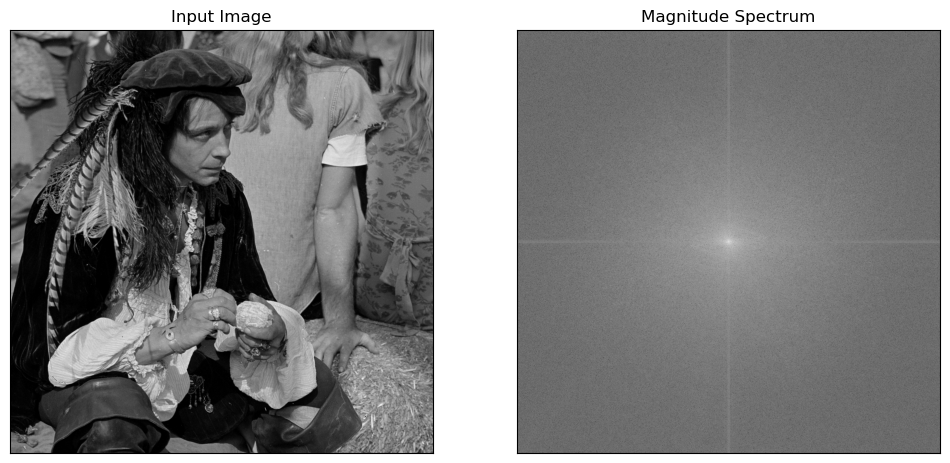

In [6]:
# Compute the 2D Fourier transform of the image
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero frequency component to the center
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum of the transform
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Display the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [8]:
def dft2d(image):
    # Get the dimensions of the image
    rows, cols = image.shape
    
    # Create an output array of the same shape, initialized to complex zeros
    output = np.zeros((rows, cols), dtype=complex)
    
    # Compute the 2D DFT
    for u in range(rows):
        for v in range(cols):
            sum_val = 0.0 + 0.0j
            for x in range(rows):
                for y in range(cols):
                    exponent = -2j * np.pi * (u * x / rows + v * y / cols)
                    sum_val += image[x, y] * np.exp(exponent)
            output[u, v] = sum_val
    
    return output

def idft2d(dft_output):
    # Get the dimensions of the DFT output
    rows, cols = dft_output.shape
    
    # Create an output array of the same shape, initialized to complex zeros
    output = np.zeros((rows, cols), dtype=complex)
    
    # Compute the 2D Inverse DFT
    for x in range(rows):
        for y in range(cols):
            sum_val = 0.0 + 0.0j
            for u in range(rows):
                for v in range(cols):
                    exponent = 2j * np.pi * (u * x / rows + v * y / cols)
                    sum_val += dft_output[u, v] * np.exp(exponent)
            output[x, y] = sum_val / (rows * cols)
    
    return output

def compute_magnitude_spectrum(dft_output):
    # Compute the magnitude spectrum of the DFT output
    magnitude_spectrum = np.log(np.abs(dft_output) + 1)
    return magnitude_spectrum



In [ ]:
# Compute the 2D DFT of the image
dft_output = dft2d(image)

# Compute the magnitude spectrum
magnitude_spectrum = compute_magnitude_spectrum(dft_output)

# Shift the zero frequency component to the center
magnitude_spectrum_shifted = np.fft.fftshift(magnitude_spectrum)

# Display the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_shifted, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
